In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('cardekho.csv')
df.head().T

,0,1,2,3,4
name,Maruti Swift Dzire VDI,Skoda Rapid 1.5 TDI Ambition,Honda City 2017-2020 EXi,Hyundai i20 Sportz Diesel,Maruti Swift VXI BSIII
year,2014,2014,2006,2010,2007
selling_price,450000,370000,158000,225000,130000
km_driven,145500,120000,140000,127000,120000
fuel,Diesel,Diesel,Petrol,Diesel,Petrol
seller_type,Individual,Individual,Individual,Individual,Individual
transmission,Manual,Manual,Manual,Manual,Manual
owner,First Owner,Second Owner,Third Owner,First Owner,First Owner
mileage(km/ltr/kg),23.4,21.14,17.7,23.0,16.1
engine,1248.0,1498.0,1497.0,1396.0,1298.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [8]:
quantitive_meaure = []
object = []
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        quantitive_meaure.append(col)
    else:
        object.append(col)
len(quantitive_meaure),len(object)

(7, 5)

In [5]:
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [6]:
# Convert max power into numerical dtype(float64)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power'] = df['max_power'].astype('float64')

In [7]:
df['max_power'].dtype

dtype('float64')

In [9]:
# To remove the duplicate records within the dataset
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6718 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6720 non-null   float64
 11  seats               6718 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [11]:
df[quantitive_meaure].describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.00000,6718.000000,6720.000000,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.46531,1430.891337,87.726919,5.434653
std,4.078286,5.197670e+05,5.835810e+04,4.04915,493.493277,31.771619,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.80000,1197.000000,67.100000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.44000,1248.000000,81.830000,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.50000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,400.000000,14.000000


In [15]:
quantitive_meaure , object

(['year',
  'selling_price',
  'km_driven',
  'mileage(km/ltr/kg)',
  'engine',
  'max_power',
  'seats'],
 ['name', 'fuel', 'seller_type', 'transmission', 'owner'])

Text(0.5, 0, 'Owner')

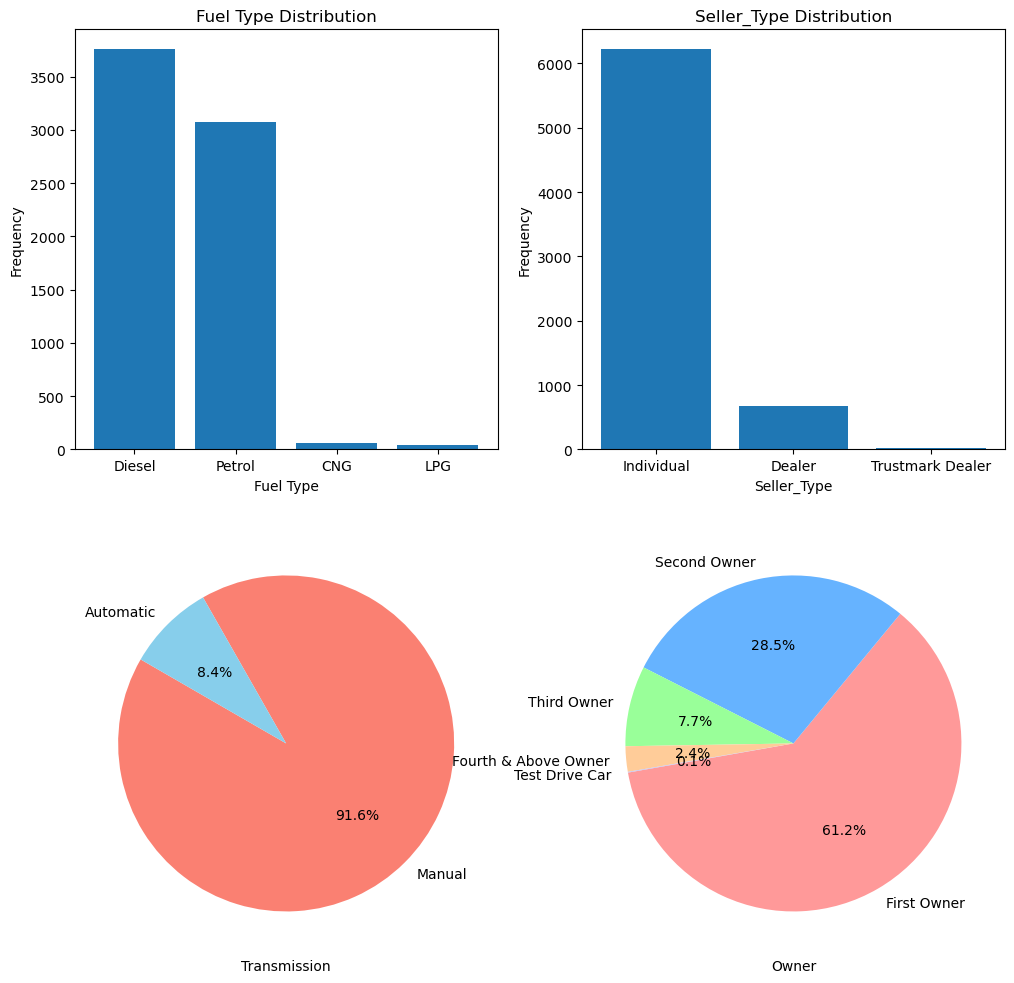

In [12]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize = (12,12))
fuel = df[object[1]].value_counts()
ax[0,0].bar(fuel.index,fuel.values)
ax[0,0].set_xlabel('Fuel Type')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Fuel Type Distribution');
seller = df[object[2]].value_counts()
ax[0,1].bar(seller.index,seller.values)
ax[0,1].set_xlabel('Seller_Type')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('Seller_Type Distribution');
transmission = df[object[3]].value_counts()
ax[1,0].pie(transmission,labels = transmission.index,autopct = "%1.1f%%",startangle = 150,colors = ['salmon','skyblue'])
ax[1,0].set_xlabel('Transmission')
owner = df[object[4]].value_counts()
ax[1,1].pie(owner,labels = owner.index,autopct = "%1.1f%%",startangle = 190,colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
ax[1,1].set_xlabel('Owner')

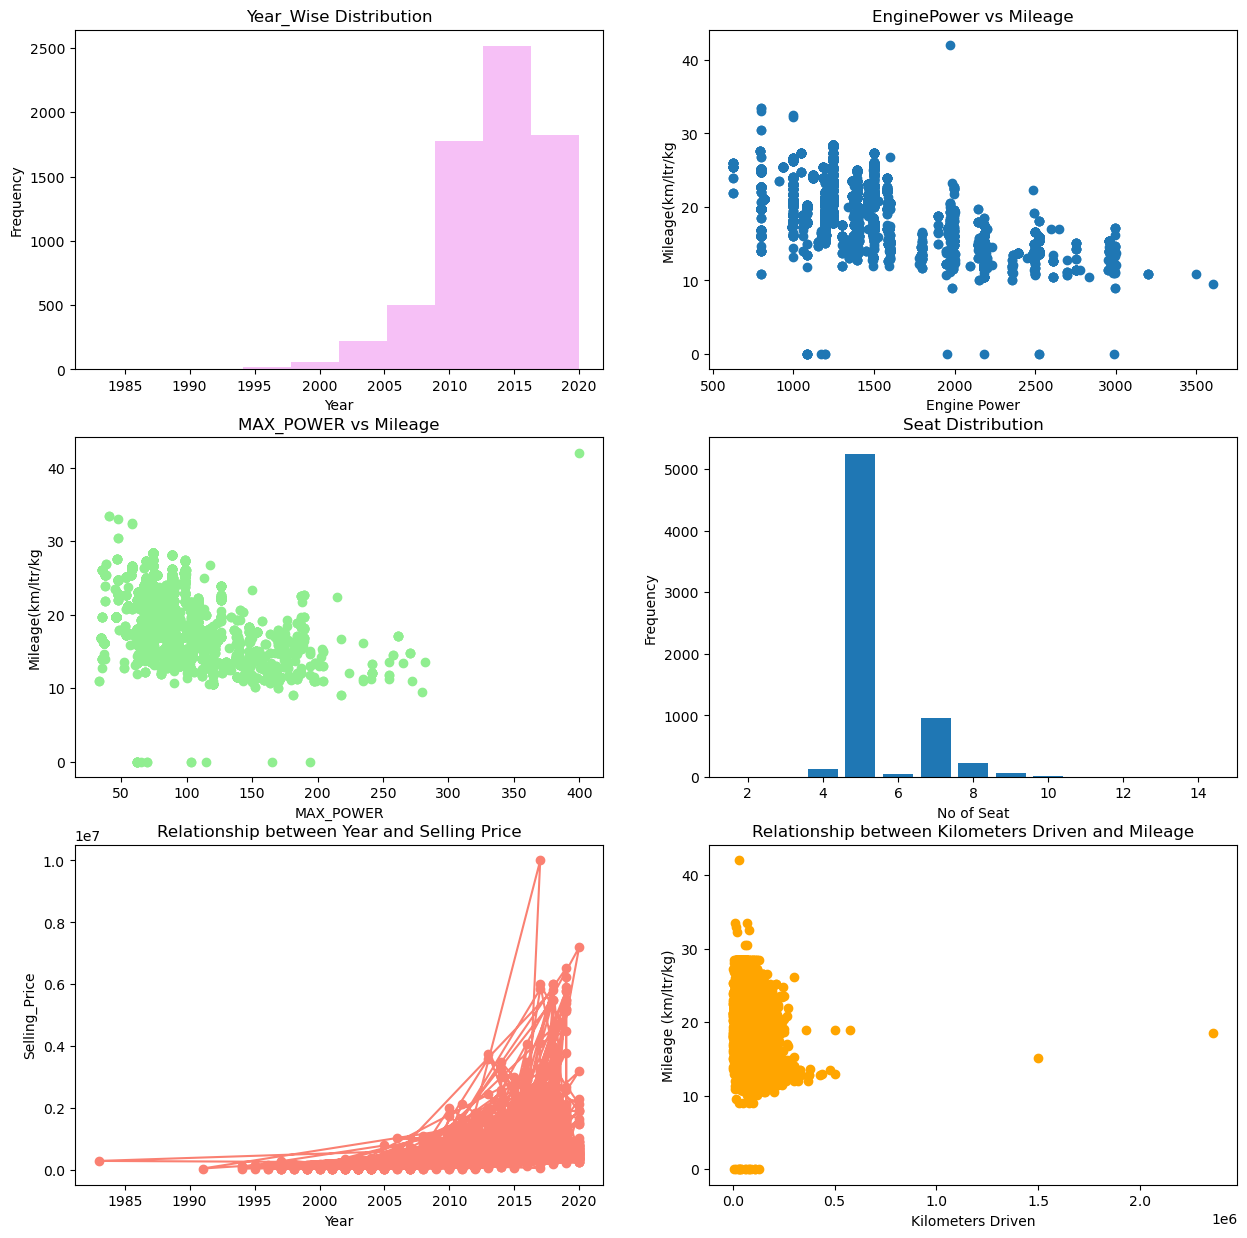

In [13]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize = (15,15))
ax[0,0].hist(df['year'],bins = 10,alpha = 0.5,color = 'violet')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Year_Wise Distribution');
ax[0,1].scatter(df['engine'],df['mileage(km/ltr/kg)'])
ax[0,1].set_xlabel('Engine Power')
ax[0,1].set_ylabel('Mileage(km/ltr/kg')
ax[0,1].set_title('EnginePower vs Mileage');
ax[1,0].scatter(df['max_power'],df['mileage(km/ltr/kg)'],color = 'lightgreen')
ax[1,0].set_xlabel('MAX_POWER')
ax[1,0].set_ylabel('Mileage(km/ltr/kg')
ax[1,0].set_title('MAX_POWER vs Mileage');

seats = df['seats'].value_counts()
ax[1,1].bar(seats.index,seats.values)
ax[1,1].set_xlabel('No of Seat')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('Seat Distribution');

ax[2,0].plot(df['year'],df['selling_price'],marker='o',color='salmon')
ax[2,0].set_xlabel('Year')
ax[2,0].set_ylabel('Selling_Price')
ax[2,0].set_title("Relationship between Year and Selling Price");
ax[2,1].scatter(df['km_driven'], df['mileage(km/ltr/kg)'],color='orange')
ax[2,1].set_xlabel('Kilometers Driven')
ax[2,1].set_ylabel('Mileage (km/ltr/kg)')
ax[2,1].set_title('Relationship between Kilometers Driven and Mileage');

In [14]:
# TO check the na values
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    208
engine                208
max_power             206
seats                 208
dtype: int64

In [15]:
# Instead of fillinf the na value we simply drop the na value records as taking mean or median for this column would make any sense 
# specially for the seats column ....
df_temp = df.copy()
df_temp.dropna(inplace=True)
df_temp.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [16]:
df_temp[quantitive_meaure].corr()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
year,1.000000,0.427335,-0.387918,0.366048,-0.019763,0.159889,0.025021
selling_price,0.427335,1.000000,-0.161265,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.387918,-0.161265,1.000000,-0.196419,0.253460,0.041770,0.207890
mileage(km/ltr/kg),0.366048,-0.108655,-0.196419,1.000000,-0.579153,-0.378609,-0.459188
engine,-0.019763,0.442772,0.253460,-0.579153,1.000000,0.683506,0.658711
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028
seats,0.025021,0.158531,0.207890,-0.459188,0.658711,0.259028,1.000000


In [17]:
for labels,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        content = content.astype('category')
        df_temp[labels]=content.cat.as_ordered()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                6717 non-null   category
 1   year                6717 non-null   int64   
 2   selling_price       6717 non-null   int64   
 3   km_driven           6717 non-null   int64   
 4   fuel                6717 non-null   category
 5   seller_type         6717 non-null   category
 6   transmission        6717 non-null   category
 7   owner               6717 non-null   category
 8   mileage(km/ltr/kg)  6717 non-null   float64 
 9   engine              6717 non-null   float64 
 10  max_power           6717 non-null   float64 
 11  seats               6717 non-null   float64 
dtypes: category(5), float64(4), int64(3)
memory usage: 539.8 KB


In [18]:
owner = {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}
fuel = {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3}
seller_type = {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}
transmission= {'Manual': 0, 'Automatic': 1}

In [19]:
df_temp['owner'] = df_temp['owner'].replace(owner)
df_temp['fuel'] = df_temp['fuel'].replace(fuel)
df_temp['seller_type'] = df_temp['seller_type'].replace(seller_type)
df_temp['transmission'] = df_temp['transmission'].replace(transmission)

C:\Users\user\AppData\Local\Temp\ipykernel_3320\211765982.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp['owner'] = df_temp['owner'].replace(owner)
C:\Users\user\AppData\Local\Temp\ipykernel_3320\211765982.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_temp['owner'] = df_temp['owner'].replace(owner)
C:\Users\user\AppData\Local\Temp\ipykernel_3320\211765982.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

In [20]:
df_temp['owner'].value_counts() , df_temp['fuel'].value_counts() ,df_temp['seller_type'].value_counts() , df_temp['transmission'].value_counts()

(owner
 0    4176
 1    1888
 2     493
 3     155
 4       5
 Name: count, dtype: int64,
 fuel
 0    3658
 1    2973
 2      51
 3      35
 Name: count, dtype: int64,
 seller_type
 0    6024
 1     666
 2      27
 Name: count, dtype: int64,
 transmission
 0    6142
 1     575
 Name: count, dtype: int64)

In [108]:
pd.set_option('display.max_rows', 2000) 
pd.set_option('display.max_columns', 1000)

In [109]:
df_temp.name.value_counts()

name
Maruti Swift Dzire VDI                                    118
Maruti Alto 800 LXI                                        76
Maruti Alto LXi                                            69
Maruti Swift VDI                                           60
Maruti Alto K10 VXI                                        47
Hyundai EON Era Plus                                       44
Maruti Wagon R VXI BS IV                                   43
Maruti Alto LX                                             43
Maruti Ertiga VDI                                          42
Maruti Ritz VDi                                            40
Maruti Swift Dzire VXI                                     37
Maruti 800 AC                                              37
Maruti Swift VDI BSIV                                      34
Maruti Swift Dzire VDi                                     33
Hyundai EON Magna Plus                                     30
Renault KWID RXT                                           30
Hyu

In [21]:
df_temp.drop('name',axis = 1,inplace = True)

In [22]:
df_temp.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
year,1.000000,0.427335,-0.387918,-0.057912,0.148137,0.143997,-0.480096,0.366048,-0.019763,0.159889,0.025021
selling_price,0.427335,1.000000,-0.161265,-0.249739,0.250423,0.465538,-0.209265,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.387918,-0.161265,1.000000,-0.252409,-0.126336,-0.118965,0.252205,-0.196419,0.253460,0.041770,0.207890
fuel,-0.057912,-0.249739,-0.252409,1.000000,-0.017735,0.006634,-0.008252,-0.055126,-0.517135,-0.330331,-0.347017
seller_type,0.148137,0.250423,-0.126336,-0.017735,1.000000,0.213725,-0.151667,0.001552,0.065629,0.187339,-0.040726
transmission,0.143997,0.465538,-0.118965,0.006634,0.213725,1.000000,-0.076854,-0.173667,0.219526,0.441681,-0.019314
owner,-0.480096,-0.209265,0.252205,-0.008252,-0.151667,-0.076854,1.000000,-0.188624,0.033741,-0.052018,0.007649
mileage(km/ltr/kg),0.366048,-0.108655,-0.196419,-0.055126,0.001552,-0.173667,-0.188624,1.000000,-0.579153,-0.378609,-0.459188
engine,-0.019763,0.442772,0.253460,-0.517135,0.065629,0.219526,0.033741,-0.579153,1.000000,0.683506,0.658711
max_power,0.159889,0.692323,0.041770,-0.330331,0.187339,0.441681,-0.052018,-0.378609,0.683506,1.000000,0.259028


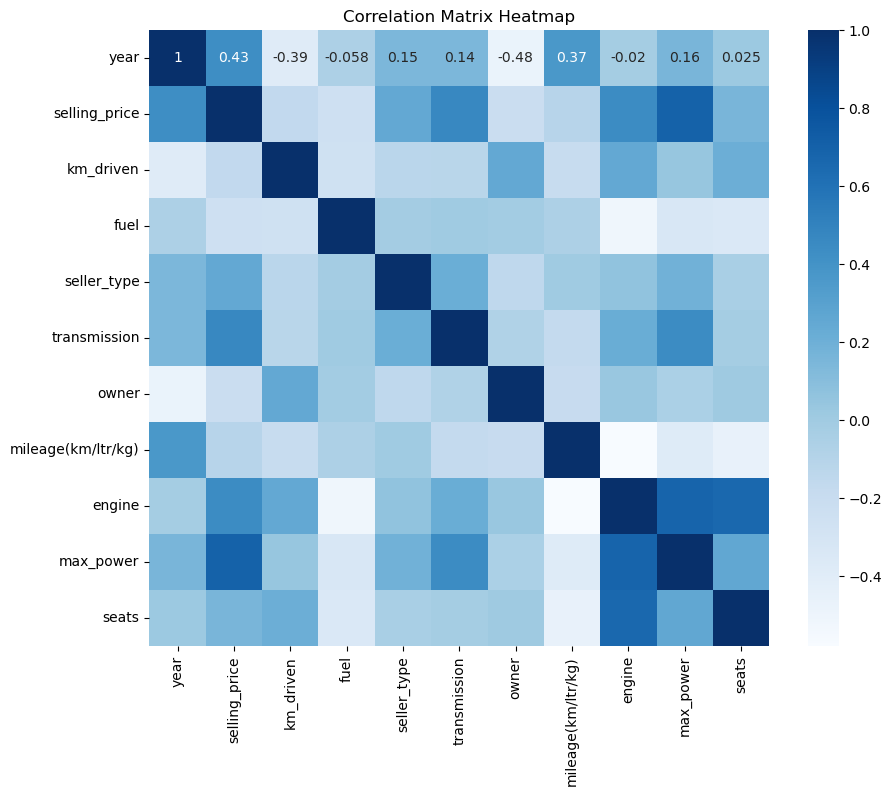

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(df_temp.corr(),cmap ='Blues',annot = True)
plt.title('Correlation Matrix Heatmap');

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [80]:
# Split the feature variables and target variable into train and test data:
x_train , x_test , y_train,y_test = train_test_split(df_temp.drop('selling_price',axis = 1),df_temp['selling_price'],test_size = 0.3)
x_train.shape,y_train.shape , x_test.shape , y_test.shape

((4701, 10), (4701,), (2016, 10), (2016,))

In [75]:
type(x_train),type(y_train),type(x_test),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [81]:
rfr = RandomForestRegressor(n_jobs=-1,
                            random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [82]:
test_score = rfr.score(x_test,y_test)
print("Score after training the model :",test_score)

Score after training the model : 0.8950426643835837


In [83]:
y_preds = rfr.predict(x_test)
y_preds

array([ 784254.9175    ,  395929.99      ,  176199.99      , ...,
       1513759.87      ,  418696.22666667,  408369.98      ])

In [102]:
print("Error:",np.sqrt(mean_squared_log_error(y_test,y_preds)))

Error: 0.2365379031502566


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
# Now to improve the accuracy of the model we need to tune the model hyperparameters by RandomizedSearchCv
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 7, 9,10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5,1, "sqrt", "log2", None]
}

In [89]:
%%time
ideal_model = RandomizedSearchCV(rfr,param_distributions=rfr_grid,n_iter=300,cv = 5,verbose = True)
ideal_model.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
CPU times: total: 11min 28s
Wall time: 4min 18s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=300,
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [90]:
ideal_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 16}

In [91]:
ideal_model.best_score_

0.8717135056108931

In [92]:
y_pred_ideal = ideal_model.predict(x_test)
y_pred_ideal

array([ 779434.75788614,  360847.25271084,  217758.40619689, ...,
       1566043.05364678,  417342.54661527,  414900.4673545 ])

In [96]:
from sklearn.metrics import mean_squared_log_error 

In [103]:
print("Error :",np.sqrt(mean_squared_log_error(y_test,y_pred_ideal)))

Error : 0.23742757828706018


In [104]:
# As tuning the hyperparameters ,the overall score of rfr model is still greater than tuned improved model 
# So final model is rfr model. as overall error is also less than the error of tuned improved model
rfr.score(x_test,y_test)


0.8950426643835837

# Features Importances

In [105]:
rfr.feature_importances_

array([0.21837649, 0.07027684, 0.00591594, 0.0026141 , 0.00755554,
       0.00504755, 0.0377897 , 0.03418202, 0.60404597, 0.01419584])

In [106]:
def plot_features(columns,importances):
    df = (pd.DataFrame({'features':columns,
                        'feature_importances':importances}).sort_values('feature_importances',ascending = False).reset_index(drop=True))
    # plot the dataframe
    fig,ax = plt.subplots()
    ax.barh(df['features'],df['feature_importances'])
    ax.set_ylabel('features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

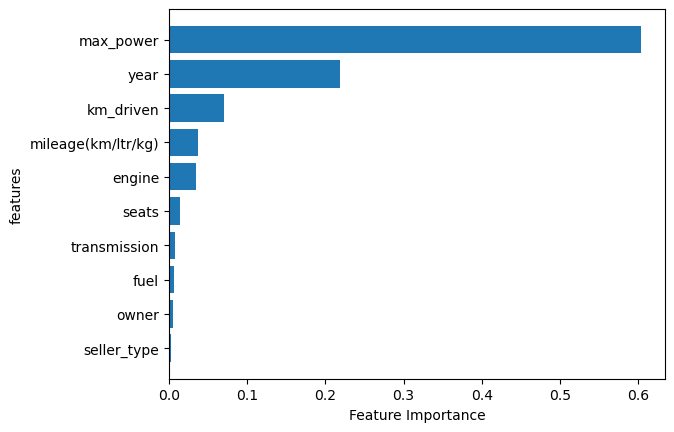

In [107]:
plot_features(x_train.columns,rfr.feature_importances_)